# Genetic Algorithm for Binary - Values

In [34]:
import numpy as np
import random 
import math
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt

In [113]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y  

def Initialization(no_of_bits, population_size):
    population = []
    for count in range(population_size):
        bits = []
        for each in range(no_of_bits):
            rand = np.random.randint(0,2)
            bits.append(rand)
        population.append(bits)
    return population

def Selection(population, method, arrangement):
    N = np.shape(population)[0]
    population1 = population
    new_list = []
    for each in range(N):
        rand1 = random.random()*np.shape(population1)[0]
        rand2 = random.random()*np.shape(population1)[0]
        index1 = int(rand1 - rand1%1)
        index2 = int(rand2 - rand2%1)
        if arrangement.lower() == "max":
            if method(bool2int(population1[index1]))>= method(bool2int(population1[index2])):
                new_list.append(population1[index1])
                np.delete(population1, index1)
            else:
                new_list.append(population1[index2])
                np.delete(population1, index2)
        elif arrangement.lower() == "min":
            if method(bool2int(population1[index1]))<= method(bool2int(population1[index2])):
                new_list.append(population1[index1])
                np.delete(population1, index1)
            else:
                new_list.append(population1[index2])
                np.delete(population1, index1)
        else:
            print("You have entered a wrong value for arrangement")
            exit()
    return new_list
def Crossover(p, population):
    pop = population
    for each in range(int(p*np.shape(pop)[0])):
        rand1 = random.random()*np.shape(pop)[0]
        rand2 = random.random()*np.shape(pop)[0]
        parent1 = np.asarray(pop[int(rand1 - rand1%1)],dtype=int)
        parent2 = np.asarray(pop[int(rand2 - rand2%1)],dtype=int)
        rand3 = int(random.randrange(0,np.shape(pop[0])[0]))
        #print(type(parent1[:rand3]))
        #print(parent2[rand3:])
        child1 = np.ndarray.tolist(np.concatenate([parent1[:rand3],parent2[rand3:]]))
        child2 = np.ndarray.tolist(np.concatenate([parent2[:rand3],parent1[rand3:]]))
        pop.append(child1)
        pop.append(child2)
    return pop
def Mutation(p , population):
    pop = population
    for each in range(int(p*np.shape(pop)[0])):
        rand1 = random.random()*np.shape(pop)[0]
        parent1 = (pop[int(rand1 - rand1%1)])
        rand3 = int(random.randrange(0,np.shape(pop[0])[0]))
        if parent1[rand3] == 1:
            parent1[rand3] = 0
        else :
            parent1[rand3] = 1
        pop.append(parent1)
    return pop
def Next_Gen(population, function, arrangement, actual):
    output = []
    i = 0
    for each in population:
        output.append(function(bool2int(population[i])))
        i = i + 1
    #print(population)
    pops = list(population)
    #print(np.shape(pops), np.shape(output))
    pops2 = np.column_stack((np.array(pops),np.array(output))) 
    #print(np.shape(pops2))
    ind = np.argsort(pops2[:,-1]);
    #print(pops2)
    sorted_list = pops2[ind]
    #print(sorted_list)
    if arrangement.lower() == "min":
        return sorted_list[:actual, :-1]
    elif arrangement.lower() == "max":
        return sorted_list[-actual:, :-1]

In [115]:
def method(X):
    return np.sum(np.array(X)**2)
best = []
output = []
i = Initialization(100 ,100)
for each in range(1000):
    selected = Selection(i, method, "min")
    crossover = Crossover(0.8, selected)
    mutated = Mutation(0.2, crossover)
    i = Next_Gen(mutated, method, "min", 100)
    best.append(i)
    output.append(method(i))

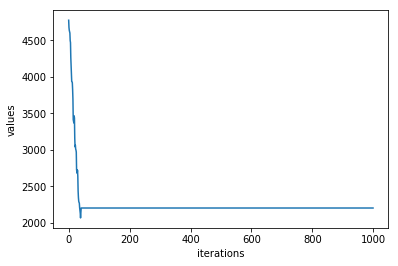

In [116]:
plt.plot(output )
plt.ylabel('values')
plt.xlabel('iterations')
plt.show()

# New heading